## Tunning UMAP parameters

In [1]:
import random

import numpy as np
import pandas as pd

import umap
import umap.plot as uplot

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
random.seed(2)

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, e

In [2]:
df = pd.read_json('data/mammoth_3d.json')
df.columns = ['x', 'y', 'z']

In [3]:
df.head()

,x,y,z
0,430.826,106.864,24.492
1,397.734,99.293,14.370
2,480.505,80.876,131.561
3,422.736,87.715,13.504
4,414.840,113.363,78.061


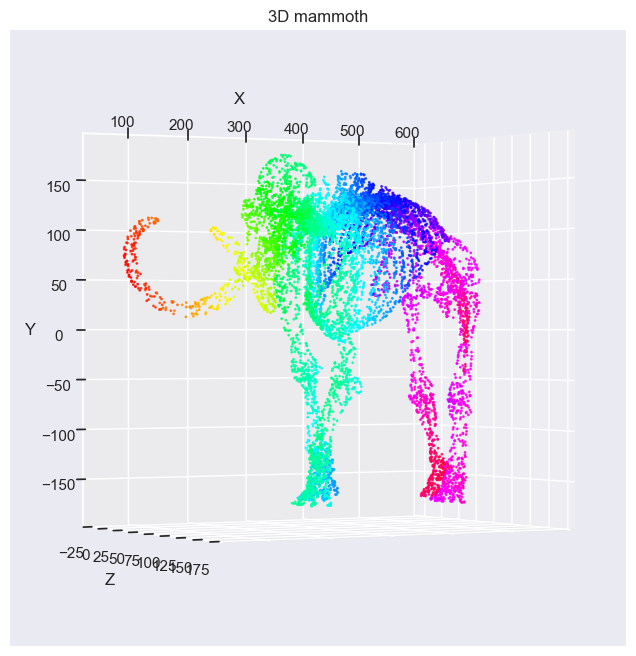

In [4]:
# Create values for colormap
max_value = df[['x', 'y', 'z']].to_numpy().max()
min_value = df[['x', 'y', 'z']].to_numpy().min()
df_normalized = (df - min_value) / (max_value - min_value)

norm = np.sqrt(df['x'].to_numpy()**2 + df['y'].to_numpy()**2 + df['z'].to_numpy()**2)
norm = (norm - np.min(norm)) / (np.max(norm) - np.min(norm))
colormap = plt.cm.hsv


# Plot the data
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x'], df['y'], df['z'], s=1, alpha=0.8, c=colormap(norm))


# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D mammoth')

ax.view_init(elev=60, azim=-180, roll=-90)


# Show the plot
plt.show()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


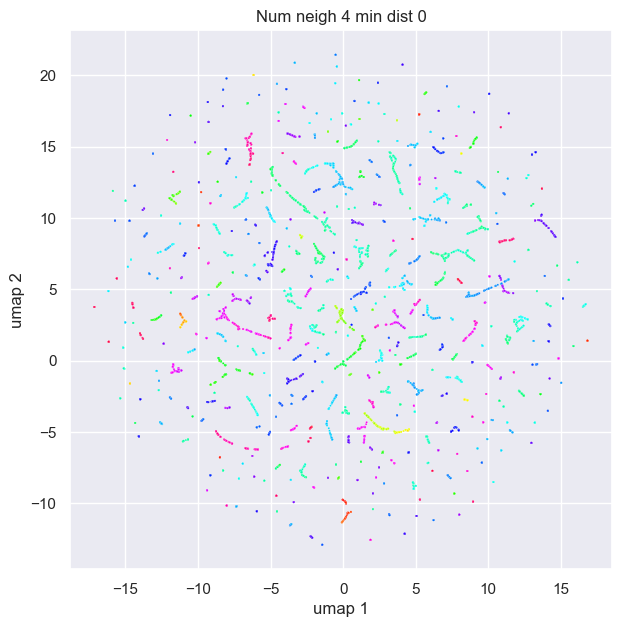

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


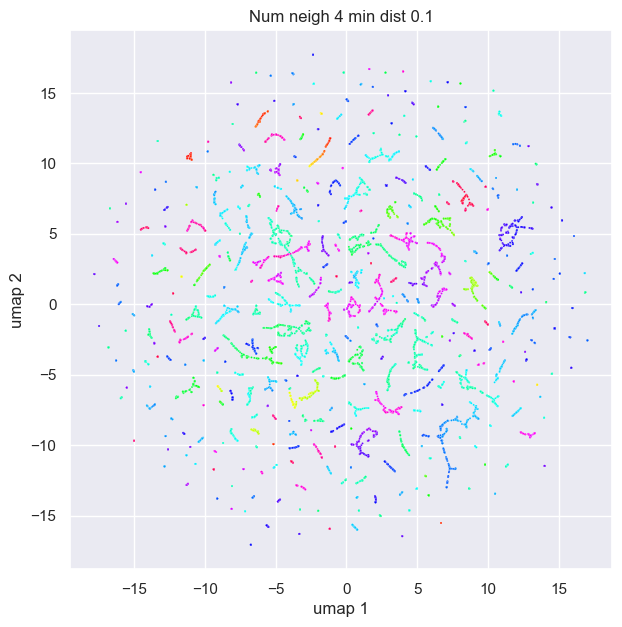

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


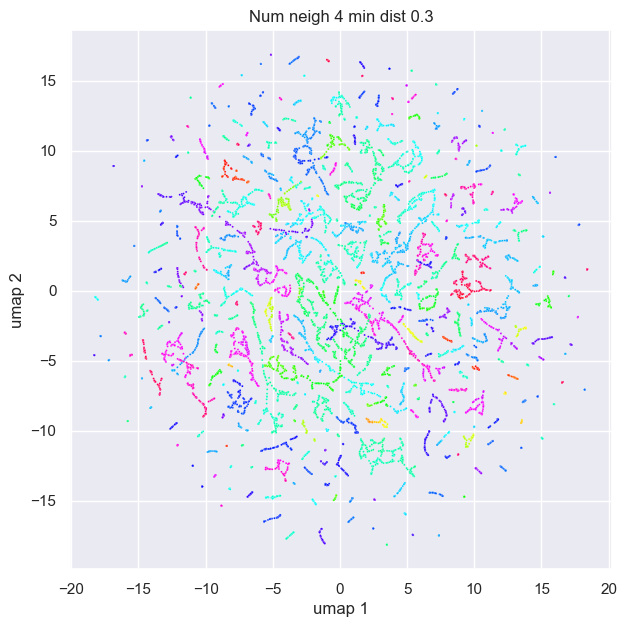

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [5]:
for n_neighbors in [4, 15, 50, 100]:

    for min_dist in [0, 0.1, 0.3, 0.5, 0.95]:

        mnist_umap = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
        embedding = mnist_umap.fit_transform(df)

        mm_embedded = pd.DataFrame(embedding, columns=['umap 1', 'umap 2'])

        plt.figure(figsize=(7,7))

        sns.scatterplot(mm_embedded, x='umap 1', y='umap 2', color=colormap(norm), s=2) 
        
        plt.title('Num neigh {} min dist {}'.format(n_neighbors, min_dist))
        
        plt.show()